In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

In [2]:
data = pd.read_csv('features_3_sec.csv')

In [3]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
# music_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [5]:
data[data['label']=='jazz'][0:10]


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
4992,jazz.00000.0.wav,66149,0.330994,0.079372,0.027391,0.000453,1881.828203,585773.386990,2092.319364,292619.613874,...,18.742546,-1.921320,35.105392,3.570771,44.833961,4.775205,43.541439,3.288585,53.712883,jazz
4993,jazz.00000.1.wav,66149,0.261249,0.081571,0.023539,0.000141,1537.666808,226743.700528,1664.019529,111661.865618,...,25.649015,-4.231021,22.553967,2.258785,24.966520,1.145652,18.952309,-2.832868,62.279236,jazz
4994,jazz.00000.2.wav,66149,0.310053,0.087600,0.053784,0.001329,2104.930073,389618.855230,2045.638378,201275.318068,...,30.472874,-2.096506,20.724476,3.123754,66.094124,1.297767,56.594360,-3.083811,83.864265,jazz
4995,jazz.00000.3.wav,66149,0.370386,0.084724,0.039143,0.000723,1109.210390,77949.701830,1442.165931,67262.289458,...,94.445641,2.253513,30.079237,2.008813,34.936729,-4.485865,27.417599,-9.007836,41.241886,jazz
4996,jazz.00000.4.wav,66149,0.334898,0.087591,0.058784,0.000998,1823.933327,699220.185995,1954.660600,343144.107523,...,62.328457,2.925271,35.069344,-0.374802,35.512283,-5.833799,76.249802,-4.391438,43.121239,jazz
4997,jazz.00000.5.wav,66149,0.375033,0.086183,0.097926,0.001277,2309.183565,650013.055856,2344.942700,213468.802458,...,28.613495,1.505378,36.486980,5.236037,55.599258,-0.948718,58.854462,-2.109333,31.023100,jazz
4998,jazz.00000.6.wav,66149,0.343314,0.083300,0.089558,0.001310,1306.702707,156354.925713,1694.827038,164417.205175,...,22.550158,-0.904637,36.711288,1.962627,53.146034,0.943407,26.023825,-4.230787,39.300648,jazz
4999,jazz.00000.7.wav,66149,0.440961,0.075869,0.041381,0.001783,885.522813,193173.413098,1293.505561,160666.470611,...,26.101446,-4.449687,53.368404,-4.459384,55.991142,-6.836246,13.719394,-5.837261,21.784670,jazz
5000,jazz.00000.8.wav,66149,0.357750,0.080276,0.019560,0.000105,1089.293124,171341.554750,1548.841369,123101.023112,...,39.045216,-3.926418,44.033512,-5.145268,19.705563,-5.966707,17.908947,-2.310710,20.025391,jazz
5001,jazz.00000.9.wav,66149,0.324188,0.081368,0.017003,0.000040,977.010906,93448.418721,1448.321224,105195.720240,...,34.934895,-4.870658,28.583160,-4.965580,31.263603,-3.957637,18.062601,-1.814457,20.240137,jazz


In [6]:
dataset = data[data['label'].isin(['blues', 'classical','jazz', 'metal', 'pop'])].drop(['filename','length'],axis=1)
dataset.shape

(4998, 58)

In [7]:
# K Neighbors Classification

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [9]:
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
y.shape

(4998,)

In [10]:
X = MinMaxScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
print(X)
X.shape

[[0.3523356  0.63913252 0.29313326 ... 0.0219101  0.50674637 0.04012747]
 [0.36463963 0.58000401 0.25303986 ... 0.07780653 0.59302914 0.05803721]
 [0.37066298 0.65354257 0.29675262 ... 0.03903949 0.5462638  0.02831415]
 ...
 [0.37229194 0.77819943 0.29251327 ... 0.11356729 0.64629355 0.12363882]
 [0.38197979 0.66233333 0.33319806 ... 0.13081738 0.64831024 0.12984157]
 [0.34637412 0.70579508 0.32071544 ... 0.16856425 0.5868855  0.15941523]]


(4998, 57)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3998, 57) (3998,)
Test set: (1000, 57) (1000,)


In [12]:
knn = KNeighborsClassifier(n_neighbors=6,weights='distance',metric='minkowski',p=2)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       213
           1       0.94      0.94      0.94       200
           2       0.91      0.91      0.91       199
           3       1.00      0.99      1.00       186
           4       0.99      0.98      0.98       202

   micro avg       0.96      0.96      0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [16]:
#LogisticRegression

In [17]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.12, solver='lbfgs', verbose=0 ,multi_class='auto').fit(X_train,y_train)
LR

LogisticRegression(C=0.12, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = LR.predict(X_test)

In [20]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       313
           1       0.93      0.95      0.94       308
           2       0.86      0.87      0.86       289
           3       0.94      0.97      0.95       289
           4       0.99      0.98      0.98       301

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.928

In [22]:
#Support Vector Machines

In [23]:
from sklearn import svm

In [24]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
rbf = svm.SVC(kernel='rbf',degree=1,decision_function_shape='ovo' ).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=1,decision_function_shape='ovo' ).fit(X_train, y_train)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [27]:
print("Poly_pred:")
print (classification_report(y_test, poly_pred))

Poly_pred:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       213
           1       0.92      0.94      0.93       200
           2       0.86      0.85      0.86       199
           3       0.95      0.95      0.95       186
           4       0.98      0.98      0.98       202

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [28]:
print("Rbf_pred:")
print (classification_report(y_test, rbf_pred))

Rbf_pred:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       213
           1       0.92      0.94      0.93       200
           2       0.90      0.89      0.90       199
           3       0.98      0.98      0.98       186
           4       0.99      0.99      0.99       202

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [29]:
# ax = dataset[dataset['label'] == 'jazz'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='DarkBlue', label='jazz');
# dataset[dataset['label'] == 'metal'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Yellow', label='metal', ax=ax);
# dataset[dataset['label'] == 'classical'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Green', label='classical', ax=ax);
# dataset[dataset['label'] == 'blues'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Red', label='blues', ax=ax);
# dataset[dataset['label'] == 'pop'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Pink', label='pop', ax=ax);
# plt.show()

In [30]:
#Decsission Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [32]:
musicTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
musicTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
musicTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
predTree = musicTree.predict(X_test)

In [35]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.886


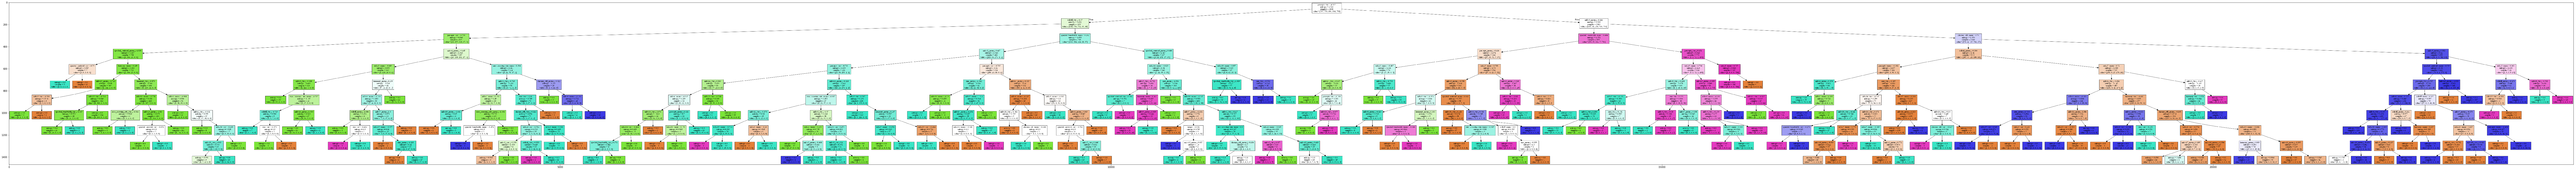

In [36]:
dot_data = StringIO()
filename = "musictree_3sec_10.png"
featureNames = dataset.columns[0:57]
targetNames = dataset["label"].unique().tolist()
out=tree.export_graphviz(musicTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')

In [37]:
#RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

In [40]:
rforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
predForest = rforest.predict(X_test)
print("Random Forrest Accuracy: ", metrics.accuracy_score(y_test, predForest))

Random Forrest Accuracy:  0.944
